<a href="https://colab.research.google.com/github/samhitakolichala/Ridge-Lasso-auto-mpg-/blob/main/Ridge_Lasso(auto_mpg).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REGULARIZATION

importing the libraries

In [ ]:
%matplotlib inline

#numerical libraries

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/auto-mpg.csv")

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df[df['horsepower'].str.isnumeric()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


Now we will replace these '6' '?' values by " np.nan"

In [ ]:
df=df.replace('?',np.nan)

In [ ]:
df=df.drop('car name',axis=1)

to fill null values by the median values

In [ ]:
df=df.apply(lambda x: x.fillna(x.median()),axis=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


splitting into dependent(y) and Independent(X)

In [ ]:
X=df.drop('mpg',axis=1)

y=df[['mpg']]

In [ ]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1
394,4,97.0,52,2130,24.6,82,2
395,4,135.0,84,2295,11.6,82,1
396,4,120.0,79,2625,18.6,82,1


In [ ]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


Distribution plots of independent variables (X)

<ipython-input-13-0679a07b5d93>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i])
<ipython-input-13-0679a07b5d93>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i])
<ipython-input-13-0679a07b5d93>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14

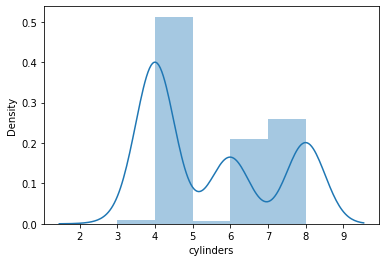

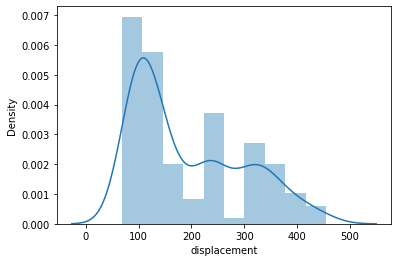

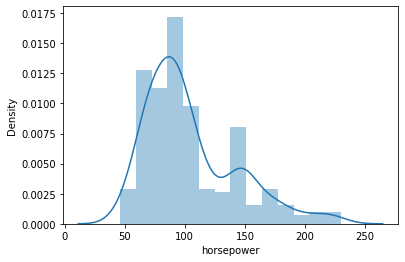

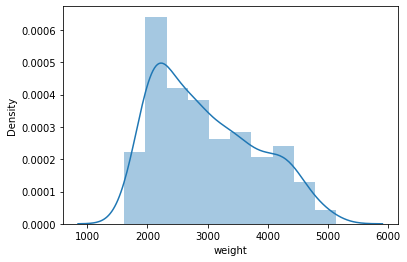

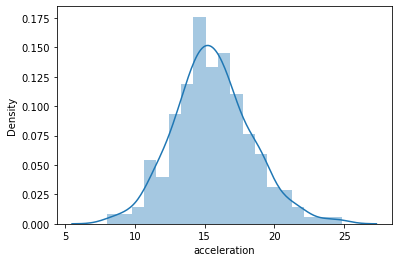

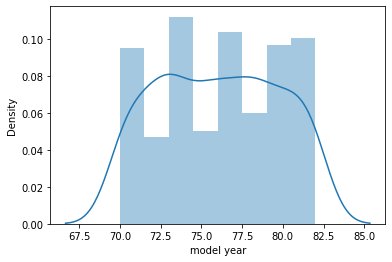

In [ ]:
a=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
for i in a:
    plt.figure()
    sns.distplot(X[i])

Displacement , horsepower,weight are right skewed , acceleration is normally distributed,model_year is normal but wider at center,cylinders have certain values that are repeating  



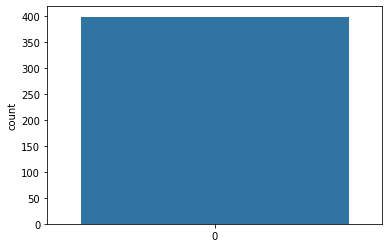

In [ ]:
a=['origin']
for i in a:
    plt.figure()
    sns.countplot(X[i])

Here in the above count plot in "origin" '1' is repeating more

Dist plot of dependent variable

<ipython-input-15-78b2b399f911>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y['mpg'])


<Axes: xlabel='mpg', ylabel='Density'>

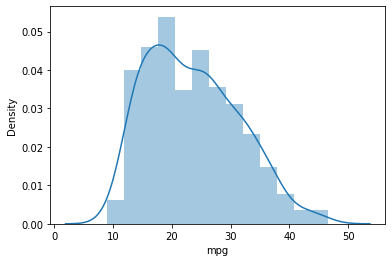

In [ ]:
sns.distplot(y['mpg'])

"mpg" is skewed to right

In [ ]:
from sklearn import preprocessing

#scale all the columns of df, this will produce a numpy array

X_scaled=preprocessing.scale(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)  # the training and test should be

y_scaled=preprocessing.scale(y)
y_scaled=pd.DataFrame(y_scaled,columns=y.columns)  # ideally the train,test should be

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_scaled,test_size=0.3,random_state=1)

Simple Linear model

In [ ]:
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)

for idx,col_name in enumerate(X_train.columns):
  print("the coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

the coefficient for cylinders is -0.08561436895562706
the coefficient for displacement is 0.3044182253593021
the coefficient for horsepower is -0.09718466302484209
the coefficient for weight is -0.7628632829136761
the coefficient for acceleration is 0.021591275172924747
the coefficient for model year is 0.3749408074118709
the coefficient for origin is 0.12302637024556841


Here , the coefficients are relatively smaller. So this can be a smoother model.

In [ ]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.012833128293992874


Regularized-Ridge Model

In [ ]:
ridge = Ridge(alpha=.3) #coefficients are prevented to become too big by this alpha value
ridge.fit(X_train,y_train)
for i,col in enumerate(X_train.columns):   
    print ("Ridge model coefficients for {} is {}:".format(col,ridge.coef_[0][i]))

Ridge model coefficients for cylinders is -0.08073001909555927:
Ridge model coefficients for displacement is 0.28822207417231654:
Ridge model coefficients for horsepower is -0.09985675156606108:
Ridge model coefficients for weight is -0.7510550916024499:
Ridge model coefficients for acceleration is 0.019127698314832926:
Ridge model coefficients for model year is 0.37378312489584287:
Ridge model coefficients for origin is 0.1221271728580029:


**We can see less coefficients values compared to linear regression. Since it is smoother model we will not see much difference in coefficient.**

Regularized-Lasso Model

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
for i,col in enumerate(X_train):
    print ("Lasso model coefficients for {} is {}:".format(col,lasso.coef_[i]))

Lasso model coefficients for cylinders is -0.0:
Lasso model coefficients for displacement is -0.0:
Lasso model coefficients for horsepower is -0.013280002937314536:
Lasso model coefficients for weight is -0.6205207866794482:
Lasso model coefficients for acceleration is 0.0:
Lasso model coefficients for model year is 0.29198732924913484:
Lasso model coefficients for origin is 0.021567653979880638:


**Many of the coefficients have become 0 so we can drop of those dimensions from the model.It has taken only 5 dimensions to build the model.Lasso is also used for feature selection.**

Comparing the scores

In [ ]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))


0.8081802739111359
0.8472274567567306


In [ ]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8081651504849107
0.8475401122140553


**Accuracy of linear and ridge are more or less same because both coefficients values are similar**

In [ ]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7853770917055521
0.8277658025171161


**Here the performance of lasso slightly gone down but this model used only 5 dimensions while other two used 8 dimensions. This model is feasible compared to other two because  dimensions are reduced**




# polynomial features 


In [ ]:
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)


In [ ]:
X_poly = poly.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(278, 29)

In [ ]:
## Simple non regularized linear model on poly features-

In [ ]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

[ 2.76250572e+13  7.27451322e-01 -1.39200215e+00 -1.77677191e+00
 -4.68903156e+00 -3.89906258e-01  2.90680427e+00  6.20842151e-01
  1.69727016e-01 -1.78810611e-01  1.40501753e+00  7.12285551e-01
 -1.05870574e+00  2.99702020e-01  1.48224971e-01  8.61984176e-01
 -5.24657821e-01  3.00085759e+00  2.04143370e+00 -1.53573088e-01
 -9.54261900e-01 -1.51137932e+00  1.60778236e+00  5.77405395e-01
 -5.32841470e-01 -1.89857628e+00  5.00806874e-01  1.50533135e+00
  1.10253666e+00]


In [ ]:
# since, there are less data points with more dimensions this linear model is overfitting.

Regularized-Ridge Model

In [ ]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.          0.64813084 -0.36554878 -2.46919357 -4.70667241 -0.63510083
   2.8499319   0.96173248 -0.49248204 -0.57492325  1.37951065  1.0927984
  -1.42036657  0.89110432 -0.16927823  1.35119104 -1.1349459   3.21038276
   1.16514278  0.22836119 -0.89663938 -1.35284633  0.79573939  0.58576253
  -0.61776911 -0.88637153  0.54014514  1.23036832  0.88256903]]


**We can see coefficients are reduced. It will reduce close to zero but not exactly equal to zero. The 0 value shown up above is rounded up value**

In [ ]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))


0.8924614223751737
0.861502546945558


Regularized-Lasso Model

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))


Lasso model: [ 0.          0.2994648  -0.08787231 -2.43642026 -4.7023043  -0.41557099
  2.82883219  0.79630585 -0.63845609 -0.19106524  1.35870323  0.71048483
 -0.95232354  0.80157019 -0.          1.30713909 -0.22245995  2.23244448
  0.41856317  0.         -0.68238432 -1.20299711  0.33414503  0.06086321
 -0.38005578 -0.07856802  0.52335532  1.11608276  0.72523195]


**Lasso making many coeficients to zero. As mentioned above these are not used for model building**

In [ ]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))


0.8910435407965047
0.8679233223131172


**Lasso is getting 86% accuracy with nearly half the number of dimensions.**

**Lasso is also used for feature selection and dimensionality reduction technique**